In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Exploring the results of the tiny order bias test !

🔎 Overall Accuracy: 75.00%

📊 Accuracy by Rotation Position:
RotationPosition
A    80.0
B    60.0
C    80.0
D    80.0
Name: Correct, dtype: float64


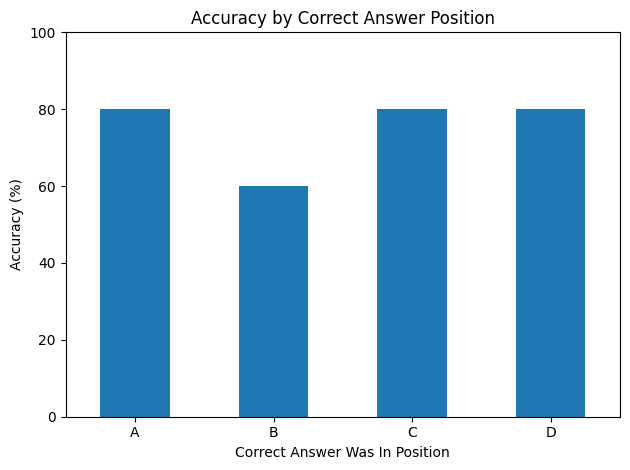

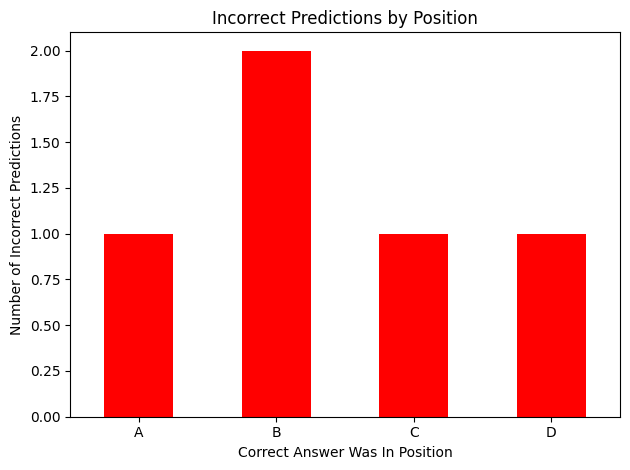


❌ Example Misclassifications:


,OriginalIndex,RotationPosition,OriginalCorrect,Predicted,RawOutput
1,0,B,B,INVALID,"To determine the correct answer, we need to an..."
4,1,A,A,C,"To analyze the options provided, we need to co..."
5,1,B,A,C,"To analyze the options provided, let's break d..."
6,1,C,A,B,"To analyze the options provided, we need to co..."
7,1,D,A,B,"To analyze the options provided, we need to co..."


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# === LOAD RESULTS ===
df = pd.read_csv("output/order_bias_gpt-4o-mini.csv")

# Normalize columns
df["Predicted"] = df["Predicted"].str.strip().str.upper()
df["OriginalCorrect"] = df["OriginalCorrect"].str.strip().str.upper()
df["Correct"] = df["Predicted"] == df["RotationPosition"]

# === OVERALL ACCURACY ===
overall_accuracy = df["Correct"].mean() * 100
print(f"🔎 Overall Accuracy: {overall_accuracy:.2f}%")

# === ACCURACY BY ROTATION POSITION ===
by_position = df.groupby("RotationPosition")["Correct"].mean().mul(100).sort_index()
print("\n📊 Accuracy by Rotation Position:")
print(by_position)

# === PLOT POSITION BIAS ===
by_position.plot(kind="bar", title="Accuracy by Correct Answer Position", ylabel="Accuracy (%)", xlabel="Correct Answer Was In Position")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# === ERROR RATE BY POSITION (OPTIONAL) ===
error_counts = df[df["Correct"] == False]["RotationPosition"].value_counts().sort_index()
error_counts.plot(kind="bar", color="red", title="Incorrect Predictions by Position")
plt.xlabel("Correct Answer Was In Position")
plt.ylabel("Number of Incorrect Predictions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# === EXAMPLE ERRORS ===
print("\n❌ Example Misclassifications:")
display(df[df["Correct"] == False][["OriginalIndex", "RotationPosition", "OriginalCorrect", "Predicted", "RawOutput"]].head(5))


🔎 Overall Accuracy: 80.00%

📊 Accuracy by Rotation Position:
RotationPosition
A    80.0
B    90.0
C    70.0
D    80.0
Name: Correct, dtype: float64


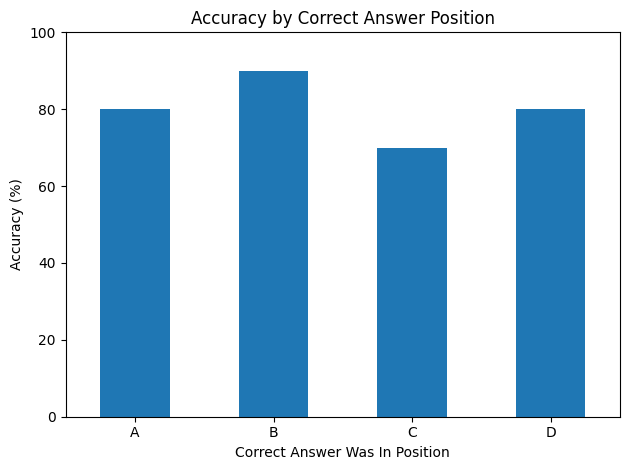

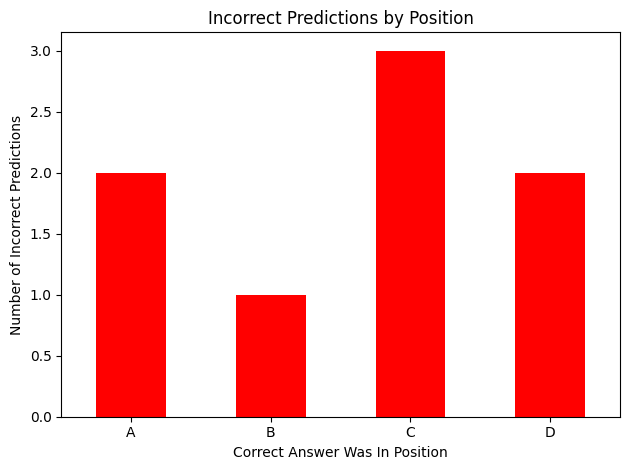


❌ Example Misclassifications:


,OriginalIndex,RotationPosition,OriginalCorrect,Predicted,RawOutput
4,1,A,A,C,"To answer this question, let's analyze each op..."
5,1,B,A,C,"To answer this question, let's analyze each op..."
6,1,C,A,B,"To answer this question, let's analyze each op..."
7,1,D,A,B,"To answer this question, let's analyze each op..."
26,6,C,C,D,To determine the nucleotide sequence of the tR...


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# === LOAD RESULTS ===
df = pd.read_csv("order_bias_gpt-4o.csv")

# Normalize columns
df["Predicted"] = df["Predicted"].str.strip().str.upper()
df["OriginalCorrect"] = df["OriginalCorrect"].str.strip().str.upper()
df["Correct"] = df["Predicted"] == df["RotationPosition"]

# === OVERALL ACCURACY ===
overall_accuracy = df["Correct"].mean() * 100
print(f"🔎 Overall Accuracy: {overall_accuracy:.2f}%")

# === ACCURACY BY ROTATION POSITION ===
by_position = df.groupby("RotationPosition")["Correct"].mean().mul(100).sort_index()
print("\n📊 Accuracy by Rotation Position:")
print(by_position)

# === PLOT POSITION BIAS ===
by_position.plot(kind="bar", title="Accuracy by Correct Answer Position", ylabel="Accuracy (%)", xlabel="Correct Answer Was In Position")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# === ERROR RATE BY POSITION (OPTIONAL) ===
error_counts = df[df["Correct"] == False]["RotationPosition"].value_counts().sort_index()
error_counts.plot(kind="bar", color="red", title="Incorrect Predictions by Position")
plt.xlabel("Correct Answer Was In Position")
plt.ylabel("Number of Incorrect Predictions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# === EXAMPLE ERRORS ===
print("\n❌ Example Misclassifications:")
display(df[df["Correct"] == False][["OriginalIndex", "RotationPosition", "OriginalCorrect", "Predicted", "RawOutput"]].head(5))
